In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.preprocessing import LabelEncoder

In [6]:
data = pd.read_csv('BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# data.isnull().sum() - 확인 결과 결측치 없음

In [4]:
#data.info() - 결측치 없음, 문자열로 된 데이터 원핫인코딩 필요

In [5]:
#data.shape

In [6]:
#data.describe()

In [7]:
#컬럼별 데이터 살펴보기

In [8]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [9]:
1627/(8500+1627)

0.1606596227905599

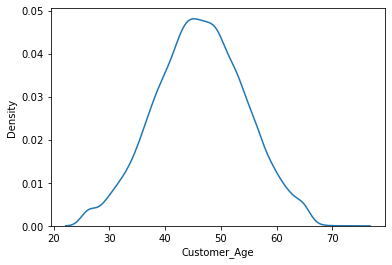

In [10]:
sns.distplot(data['Customer_Age'], hist=False)
plt.show()

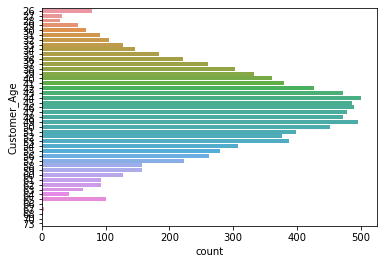

In [11]:
sns.countplot(y='Customer_Age', data=data)
plt.show()

In [12]:
data['Customer_Age'].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

In [13]:
#pd.cut(X, bins, labels) 를 이용한 연속형 변수 'Customer age'의 여러개 구간별 범주화 
bin = [20, 29, 39, 49, 59, 69, 79]
group_names = ['20대', '30대', '40대', '50대', '60대', '70대']
data['AgeGroup'] = pd.cut(data['Customer_Age'], bins=bin, labels=group_names)
data['AgeGroup'].value_counts()

40대    4561
50대    2998
30대    1841
60대     530
20대     195
70대       2
Name: AgeGroup, dtype: int64

In [14]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,AgeGroup
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,50대
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,40대
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,40대
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,30대
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377,40대


In [15]:
data['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [16]:
5358+4769

10127

In [17]:
data['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [18]:
data['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [19]:
data['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [20]:
data['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

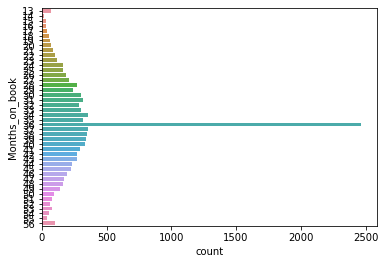

In [21]:
#data['Months_on_book'].value_counts()

sns.countplot(y='Months_on_book', data=data)
plt.show()

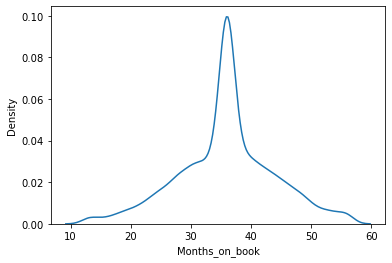

In [22]:
sns.distplot(data['Months_on_book'], hist=False)
plt.show()

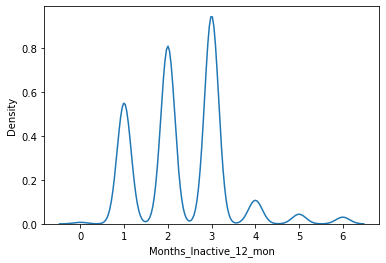

In [23]:
sns.distplot(data['Months_Inactive_12_mon'], hist=False)
plt.show()

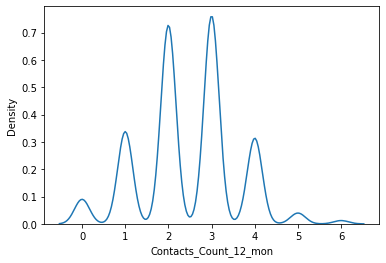

In [24]:
sns.distplot(data['Contacts_Count_12_mon'], hist=False)
plt.show()

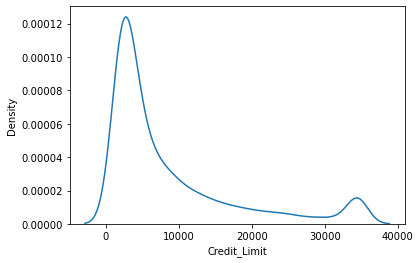

In [25]:
sns.distplot(data['Credit_Limit'], hist=False)
plt.show()

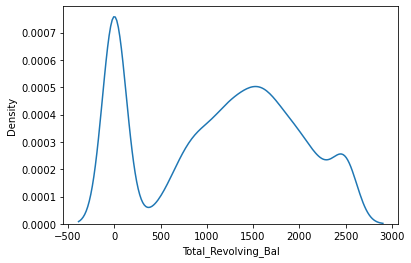

In [26]:
sns.distplot(data['Total_Revolving_Bal'], hist=False)
plt.show()

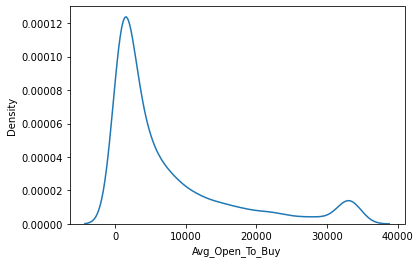

In [27]:
sns.distplot(data['Avg_Open_To_Buy'], hist=False)
plt.show()

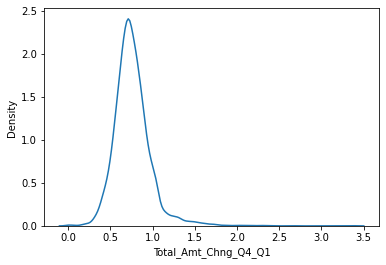

In [28]:
sns.distplot(data['Total_Amt_Chng_Q4_Q1'], hist=False)
plt.show()

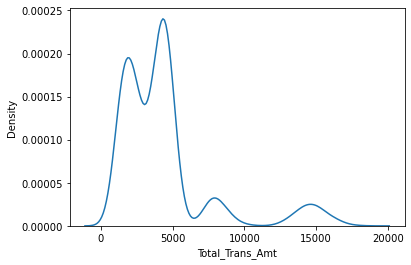

In [29]:
sns.distplot(data['Total_Trans_Amt'], hist=False)
plt.show()

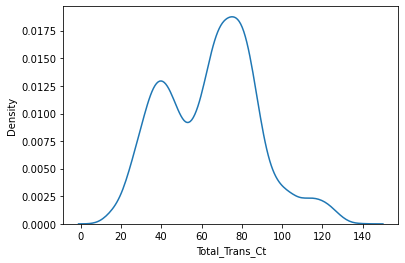

In [30]:
sns.distplot(data['Total_Trans_Ct'], hist=False)
plt.show()

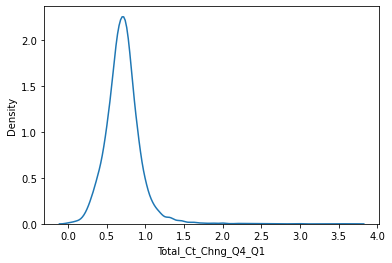

In [31]:
sns.distplot(data['Total_Ct_Chng_Q4_Q1'], hist=False)
plt.show()

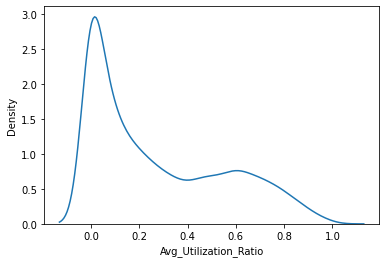

In [32]:
sns.distplot(data['Avg_Utilization_Ratio'], hist=False)
plt.show()

# 범주형 변수 -> 원핫 인코딩

In [4]:
# Gender','Marital_Status' 원핫 인코딩
oh = pd.get_dummies(data, columns = ['Gender','Marital_Status'], drop_first=True)
oh

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,Existing Customer,45,3,High School,$60K - $80K,Blue,39,5,1,...,1144,42,1.625,0.061,0.000093,0.999910,1,1,0,0
1,818770008,Existing Customer,49,5,Graduate,Less than $40K,Blue,44,6,1,...,1291,33,3.714,0.105,0.000057,0.999940,0,0,1,0
2,713982108,Existing Customer,51,3,Graduate,$80K - $120K,Blue,36,4,1,...,1887,20,2.333,0.000,0.000021,0.999980,1,1,0,0
3,769911858,Existing Customer,40,4,High School,Less than $40K,Blue,34,3,4,...,1171,20,2.333,0.760,0.000134,0.999870,0,0,0,1
4,709106358,Existing Customer,40,3,Uneducated,$60K - $80K,Blue,21,5,1,...,816,28,2.500,0.000,0.000022,0.999980,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,2,Graduate,$40K - $60K,Blue,40,3,2,...,15476,117,0.857,0.462,0.000191,0.999810,1,0,1,0
10123,710638233,Attrited Customer,41,2,Unknown,$40K - $60K,Blue,25,4,2,...,8764,69,0.683,0.511,0.995270,0.004729,1,0,0,0
10124,716506083,Attrited Customer,44,1,High School,Less than $40K,Blue,36,5,3,...,10291,60,0.818,0.000,0.997880,0.002118,0,1,0,0
10125,717406983,Attrited Customer,30,2,Graduate,$40K - $60K,Blue,36,4,3,...,8395,62,0.722,0.000,0.996710,0.003294,1,0,0,1


In [7]:
#'Attrition_Flag' 원핫 인코딩
oh2 = pd.get_dummies(oh, columns=['Attrition_Flag'])
oh3 = oh2.drop(columns =['Attrition_Flag_Existing Customer'], axis=1)
oh3

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer
0,768805383,45,3,High School,$60K - $80K,Blue,39,5,1,3,...,42,1.625,0.061,0.000093,0.999910,1,1,0,0,0
1,818770008,49,5,Graduate,Less than $40K,Blue,44,6,1,2,...,33,3.714,0.105,0.000057,0.999940,0,0,1,0,0
2,713982108,51,3,Graduate,$80K - $120K,Blue,36,4,1,0,...,20,2.333,0.000,0.000021,0.999980,1,1,0,0,0
3,769911858,40,4,High School,Less than $40K,Blue,34,3,4,1,...,20,2.333,0.760,0.000134,0.999870,0,0,0,1,0
4,709106358,40,3,Uneducated,$60K - $80K,Blue,21,5,1,0,...,28,2.500,0.000,0.000022,0.999980,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,50,2,Graduate,$40K - $60K,Blue,40,3,2,3,...,117,0.857,0.462,0.000191,0.999810,1,0,1,0,0
10123,710638233,41,2,Unknown,$40K - $60K,Blue,25,4,2,3,...,69,0.683,0.511,0.995270,0.004729,1,0,0,0,1
10124,716506083,44,1,High School,Less than $40K,Blue,36,5,3,4,...,60,0.818,0.000,0.997880,0.002118,0,1,0,0,1
10125,717406983,30,2,Graduate,$40K - $60K,Blue,36,4,3,3,...,62,0.722,0.000,0.996710,0.003294,1,0,0,1,1


In [8]:
#필요 없는 컬럼 제거
pre = oh3.drop(columns =[
                       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
              , axis=1)
pre.head()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer
0,768805383,45,3,High School,$60K - $80K,Blue,39,5,1,3,...,1.335,1144,42,1.625,0.061,1,1,0,0,0
1,818770008,49,5,Graduate,Less than $40K,Blue,44,6,1,2,...,1.541,1291,33,3.714,0.105,0,0,1,0,0
2,713982108,51,3,Graduate,$80K - $120K,Blue,36,4,1,0,...,2.594,1887,20,2.333,0.000,1,1,0,0,0
3,769911858,40,4,High School,Less than $40K,Blue,34,3,4,1,...,1.405,1171,20,2.333,0.760,0,0,0,1,0
4,709106358,40,3,Uneducated,$60K - $80K,Blue,21,5,1,0,...,2.175,816,28,2.500,0.000,1,1,0,0,0


In [9]:
# 카테고리가 3개 이상인 범주형 변수 인코딩
income_dic = {'Less than $40K' : 0, '$40K - $60K': 1, '$60K - $80K': 2,
              '$80K - $120K':3, '$120K +':4, 'Unknown': 5}
edu_dic = {'Uneducated':0, 'High School':1,'College':2,'Graduate':3,'Post-Graduate':4,
          'Doctorate':5,'Unknown':6}
card_dic={'Blue':0,'Silver':1,'Gold':2,'Platinum':3}

In [10]:
pre['new_income_category'] = pre['Income_Category'].map(income_dic)
pre['new_edu_category'] = pre['Education_Level'].map(edu_dic)
pre['new_card_category'] = pre['Card_Category'].map(card_dic)
pre.head()

,CLIENTNUM,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer,new_income_category,new_edu_category,new_card_category
0,768805383,45,3,High School,$60K - $80K,Blue,39,5,1,3,...,1.625,0.061,1,1,0,0,0,2,1,0
1,818770008,49,5,Graduate,Less than $40K,Blue,44,6,1,2,...,3.714,0.105,0,0,1,0,0,0,3,0
2,713982108,51,3,Graduate,$80K - $120K,Blue,36,4,1,0,...,2.333,0.000,1,1,0,0,0,3,3,0
3,769911858,40,4,High School,Less than $40K,Blue,34,3,4,1,...,2.333,0.760,0,0,0,1,0,0,1,0
4,709106358,40,3,Uneducated,$60K - $80K,Blue,21,5,1,0,...,2.500,0.000,1,1,0,0,0,2,0,0


In [11]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CLIENTNUM                         10127 non-null  int64  
 1   Customer_Age                      10127 non-null  int64  
 2   Dependent_count                   10127 non-null  int64  
 3   Education_Level                   10127 non-null  object 
 4   Income_Category                   10127 non-null  object 
 5   Card_Category                     10127 non-null  object 
 6   Months_on_book                    10127 non-null  int64  
 7   Total_Relationship_Count          10127 non-null  int64  
 8   Months_Inactive_12_mon            10127 non-null  int64  
 9   Contacts_Count_12_mon             10127 non-null  int64  
 10  Credit_Limit                      10127 non-null  float64
 11  Total_Revolving_Bal               10127 non-null  int64  
 12  Avg_

In [12]:
# 필요없는 컬럼 제거
pre1 = pre.drop(columns =['Education_Level', 'Income_Category', 'Card_Category'], axis=1)
pre1.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer,new_income_category,new_edu_category,new_card_category
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,1.625,0.061,1,1,0,0,0,2,1,0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,3.714,0.105,0,0,1,0,0,0,3,0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,2.333,0.000,1,1,0,0,0,3,3,0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,2.333,0.760,0,0,0,1,0,0,1,0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,2.500,0.000,1,1,0,0,0,2,0,0


In [46]:
#pre1.info()

In [13]:
pre2 = pre1.drop(columns =['CLIENTNUM'], axis=1)
pre2.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer,new_income_category,new_edu_category,new_card_category
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,1.625,0.061,1,1,0,0,0,2,1,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,3.714,0.105,0,0,1,0,0,0,3,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,2.333,0.000,1,1,0,0,0,3,3,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,2.333,0.760,0,0,0,1,0,0,1,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,2.500,0.000,1,1,0,0,0,2,0,0


In [14]:
pre2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_Age                      10127 non-null  int64  
 1   Dependent_count                   10127 non-null  int64  
 2   Months_on_book                    10127 non-null  int64  
 3   Total_Relationship_Count          10127 non-null  int64  
 4   Months_Inactive_12_mon            10127 non-null  int64  
 5   Contacts_Count_12_mon             10127 non-null  int64  
 6   Credit_Limit                      10127 non-null  float64
 7   Total_Revolving_Bal               10127 non-null  int64  
 8   Avg_Open_To_Buy                   10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 10  Total_Trans_Amt                   10127 non-null  int64  
 11  Total_Trans_Ct                    10127 non-null  int64  
 12  Tota

In [17]:
pre2.to_csv('encoding_finished_v2.csv')

In [15]:
pre2.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Attrition_Flag_Attrited Customer,new_income_category,new_edu_category,new_card_category
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,...,0.712222,0.274894,0.470919,0.462822,0.389355,0.073961,0.160660,1.744544,2.651921,0.083638
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,...,0.238086,0.275691,0.499178,0.498641,0.487628,0.261720,0.367235,1.716188,1.917002,0.333784
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,...,0.582000,0.023000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,...,0.702000,0.176000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,...,0.818000,0.503000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,...,3.714000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,6.000000,3.000000


<AxesSubplot:>

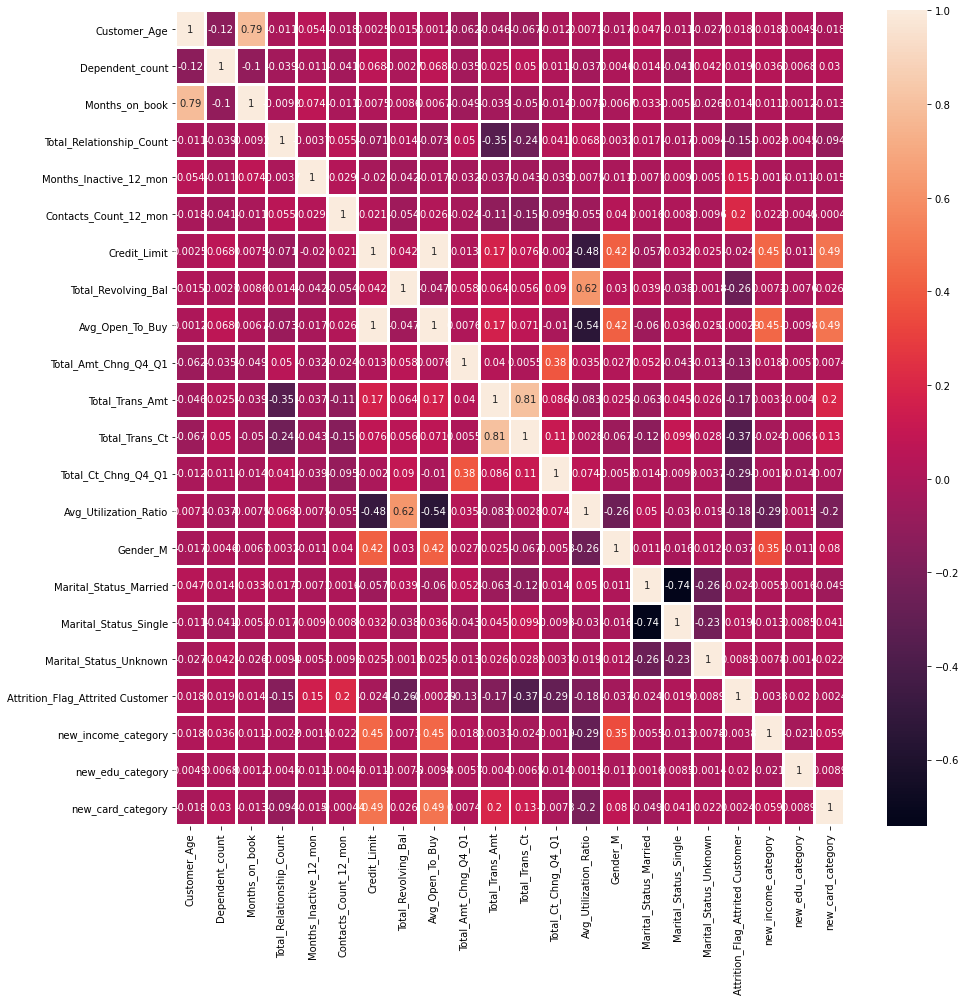

In [16]:
#heatmap
plt.subplots(figsize=(15, 15))
sns.heatmap(pre2.corr(), annot=True, linewidths=2)